# Consumer's Buying Behavior

## Available on: https://www.kaggle.com/datasets/nitishjolly/consumers-buying-behavior

### João Luiz de Castro Pereira

1. Library import:

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('social_ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


escrever

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [29]:
df['Age'].isnull().any()
print("Null values?", df['Age'].isnull().any())
print("Values under 18?", df['Age'].isin(range(1, 18)).all())
print("Values over 99?", df['Age'].gt(99).all())

Null values? False
Values under 18? False
Values over 99? False


What about the estimated salaries?

In [30]:
print("Negative Values?", df['EstimatedSalary'].lt(0).all())

Negative Values? False


Como não há um limite superior para os valores de salários estimados, checamos apenas se o dataset apresenta valores negativos

2. We need to separate features and target:

In [31]:
X = df[['Age','EstimatedSalary']]
y = df[['Purchased']]

3. Treinamento e teste:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

4. Machine Learning model:

For this application we are going to use the Random Forest Classifier, because...

In [33]:
model = RandomForestClassifier(n_estimators=40, random_state=42)
model.fit(X_train,y_train)

c:\Users\Joao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=40, random_state=42)

In [34]:
y_pred = model.predict(X_test)

5. Avaliar a eficácia do modelo:

In [35]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.9

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        73
           1       0.86      0.89      0.88        47

    accuracy                           0.90       120
   macro avg       0.89      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



c:\Users\Joao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


c:\Users\Joao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Joao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Joao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Joao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

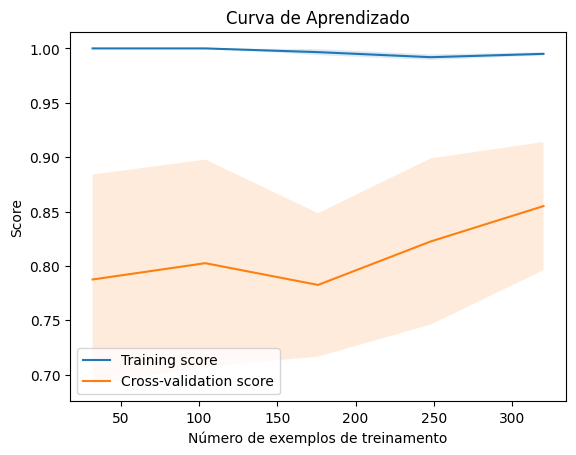

In [36]:
# Plotar a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Curva de Aprendizado')
plt.xlabel('Número de exemplos de treinamento')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()